<a href="https://colab.research.google.com/github/jiaqiwang0/COVID_Forecasting/blob/main/auto_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from google.colab import drive
import pandas as pd
import re

In [31]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [32]:
path = '/content/drive/My Drive/CS5100 Final Project/data'

In [33]:
df = pd.read_csv(path+'/time_series_covid19_confirmed_global.csv')
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/8/22,10/9/22,10/10/22,10/11/22,10/12/22,10/13/22,10/14/22,10/15/22,10/16/22,10/17/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,200202,200372,200469,200626,200729,200846,201014,201096,201212,201276
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,332472,332494,332503,332534,332555,332579,332598,332619,332638,332645
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,270701,270707,270713,270716,270722,270722,270734,270734,270740,270757
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,46275,46275,46275,46275,46366,46366,46366,46366,46366,46366
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,702804,702804,702804,702804,702804,702804,702804,702804,702804,702804
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11939,11939,11939,11939,11939,11939,11939,11939,11939,11939
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333555,333555,333624,333624,333624,333624,333624,333624,333624,333644


In [34]:
datewise= list(df.columns)
data = df[datewise[-100:]]
data

,7/10/22,7/11/22,7/12/22,7/13/22,7/14/22,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,...,10/8/22,10/9/22,10/10/22,10/11/22,10/12/22,10/13/22,10/14/22,10/15/22,10/16/22,10/17/22
0,183265,183268,183272,183285,183358,183407,183445,183572,183687,183908,...,200202,200372,200469,200626,200729,200846,201014,201096,201212,201276
1,287984,288176,289391,290954,290954,293917,295243,296305,296732,298578,...,332472,332494,332503,332534,332555,332579,332598,332619,332638,332645
2,266257,266274,266303,266328,266356,266392,266424,266445,266487,266542,...,270701,270707,270713,270716,270722,270722,270734,270734,270740,270757
3,44671,44671,44671,44671,44671,44671,44671,44671,45061,45061,...,46275,46275,46275,46275,46366,46366,46366,46366,46366,46366
4,101320,101320,101320,101320,101600,101901,101901,101901,102209,102209,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,662490,662490,662588,662588,662588,662588,662588,662588,669542,672039,...,702804,702804,702804,702804,702804,702804,702804,702804,702804,702804
285,535,535,535,535,535,535,535,535,535,535,...,535,535,535,535,535,535,535,535,535,535
286,11832,11832,11832,11832,11832,11832,11848,11848,11848,11849,...,11939,11939,11939,11939,11939,11939,11939,11939,11939,11939
287,327052,327102,327102,327102,327102,327994,327994,327994,327994,328550,...,333555,333555,333624,333624,333624,333624,333624,333624,333624,333644


In [35]:
# use the first country's data
data = data.iloc[0]

In [36]:
data

7/10/22     183265
7/11/22     183268
7/12/22     183272
7/13/22     183285
7/14/22     183358
             ...  
10/13/22    200846
10/14/22    201014
10/15/22    201096
10/16/22    201212
10/17/22    201276
Name: 0, Length: 100, dtype: int64

In [38]:
data.index = pd.to_datetime(data.index)

In [39]:
data

2022-07-10    183265
2022-07-11    183268
2022-07-12    183272
2022-07-13    183285
2022-07-14    183358
               ...  
2022-10-13    200846
2022-10-14    201014
2022-10-15    201096
2022-10-16    201212
2022-10-17    201276
Name: 0, Length: 100, dtype: int64

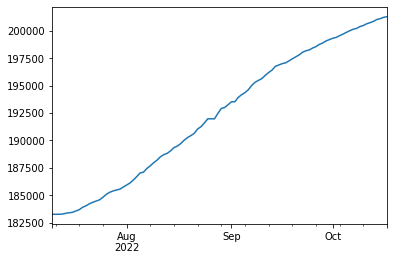

In [40]:
data.plot()

In [51]:
zero_day_daily_cases = data[0]

In [52]:
zero_day_daily_cases

183265

In [53]:
import numpy as np

In [54]:
daily_cases = data.diff().fillna(data[0]).astype(np.int64)

In [56]:
daily_cases[0] = daily_cases[0] - zero_day_daily_cases

In [57]:
daily_cases

2022-07-10      0
2022-07-11      3
2022-07-12      4
2022-07-13     13
2022-07-14     73
             ... 
2022-10-13    117
2022-10-14    168
2022-10-15     82
2022-10-16    116
2022-10-17     64
Name: 0, Length: 100, dtype: int64

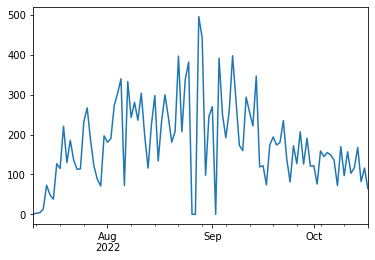

In [58]:
daily_cases.plot()

In [59]:
train = daily_cases[:70]
test = daily_cases[-30:]

In [60]:
from pmdarima.arima import auto_arima

In [61]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=790.158, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=749.346, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=787.096, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=746.209, Time=0.56 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=746.605, Time=1.35 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.69 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=744.267, Time=0.43 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=1.94 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=inf, Time=1.32 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=1.57 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.04 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.91 sec
 AR

In [62]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   70
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -368.133
Date:                              Sat, 17 Dec 2022   AIC                            744.267
Time:                                      01:51:38   BIC                            752.439
Sample:                                  07-10-2022   HQIC                           747.443
                                       - 09-17-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3658      0.158     -2.317      0.021      -0.675      -0.056
ar.S.L12      -0.4683      0.225     -2.085      0.037      -0.909      -0.028
ma.S.L12      -0.7842      0.468     -1.675      0.094      -1.702       0.133
sigma2      1.675e+04   4793.826      3.493      0.000    7351.175    2.61e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.84   Jarque-Bera (JB):                13.94
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               3.67   Skew:                             0.44
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 30),index=test.index)
prediction.columns = ['predicted_cases']
prediction

,predicted_cases
2022-09-18,77.377938
2022-09-19,-60.779077
2022-09-20,9.134571
2022-09-21,151.940546
2022-09-22,174.519725
2022-09-23,13.074447
2022-09-24,133.534170
2022-09-25,88.527982
2022-09-26,-26.384295
2022-09-27,198.627798


In [64]:
from matplotlib import pyplot as plt

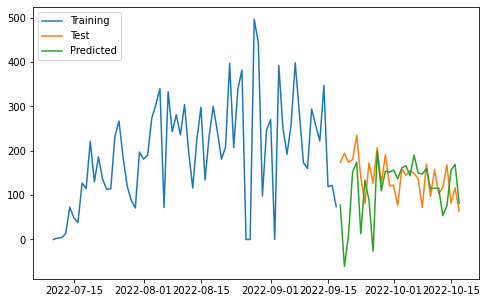

In [65]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [66]:
from sklearn.metrics import r2_score
r2_score(test, prediction['predicted_cases'])

-2.6401401868723795